In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from boruta import BorutaPy
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(389, 32)

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.890000e+02,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,...,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000
mean,2.703005e+07,14.338085,18.980180,93.437841,674.739846,0.096910,0.106998,0.094327,0.051901,0.183186,...,16.622584,25.343985,109.617069,919.890231,0.133240,0.263203,0.284089,0.119625,0.296900,0.084559
std,1.111087e+08,3.573300,4.146792,24.612722,357.460168,0.013946,0.055122,0.082024,0.039796,0.028689,...,4.969510,6.163886,34.440316,584.849742,0.023506,0.167125,0.213764,0.067647,0.067459,0.019176
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.629650e+05,11.810000,15.900000,75.710000,428.900000,0.086940,0.066360,0.030360,0.020740,0.163400,...,13.110000,20.790000,84.480000,521.700000,0.117000,0.145700,0.114400,0.063160,0.255400,0.071270
50%,8.917030e+05,13.500000,18.660000,87.210000,562.100000,0.096760,0.095800,0.069500,0.037800,0.180900,...,15.150000,25.050000,99.210000,706.200000,0.132200,0.220800,0.243400,0.108700,0.285200,0.080220
75%,8.812877e+06,16.260000,21.580000,108.100000,817.700000,0.106200,0.133600,0.137900,0.079440,0.196700,...,19.770000,29.330000,129.200000,1218.000000,0.148100,0.354200,0.396500,0.173200,0.325800,0.092610
max,9.010343e+08,28.110000,39.280000,188.500000,2499.000000,0.144700,0.345400,0.426800,0.201200,0.304000,...,33.130000,49.540000,229.300000,3432.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

<AxesSubplot:>

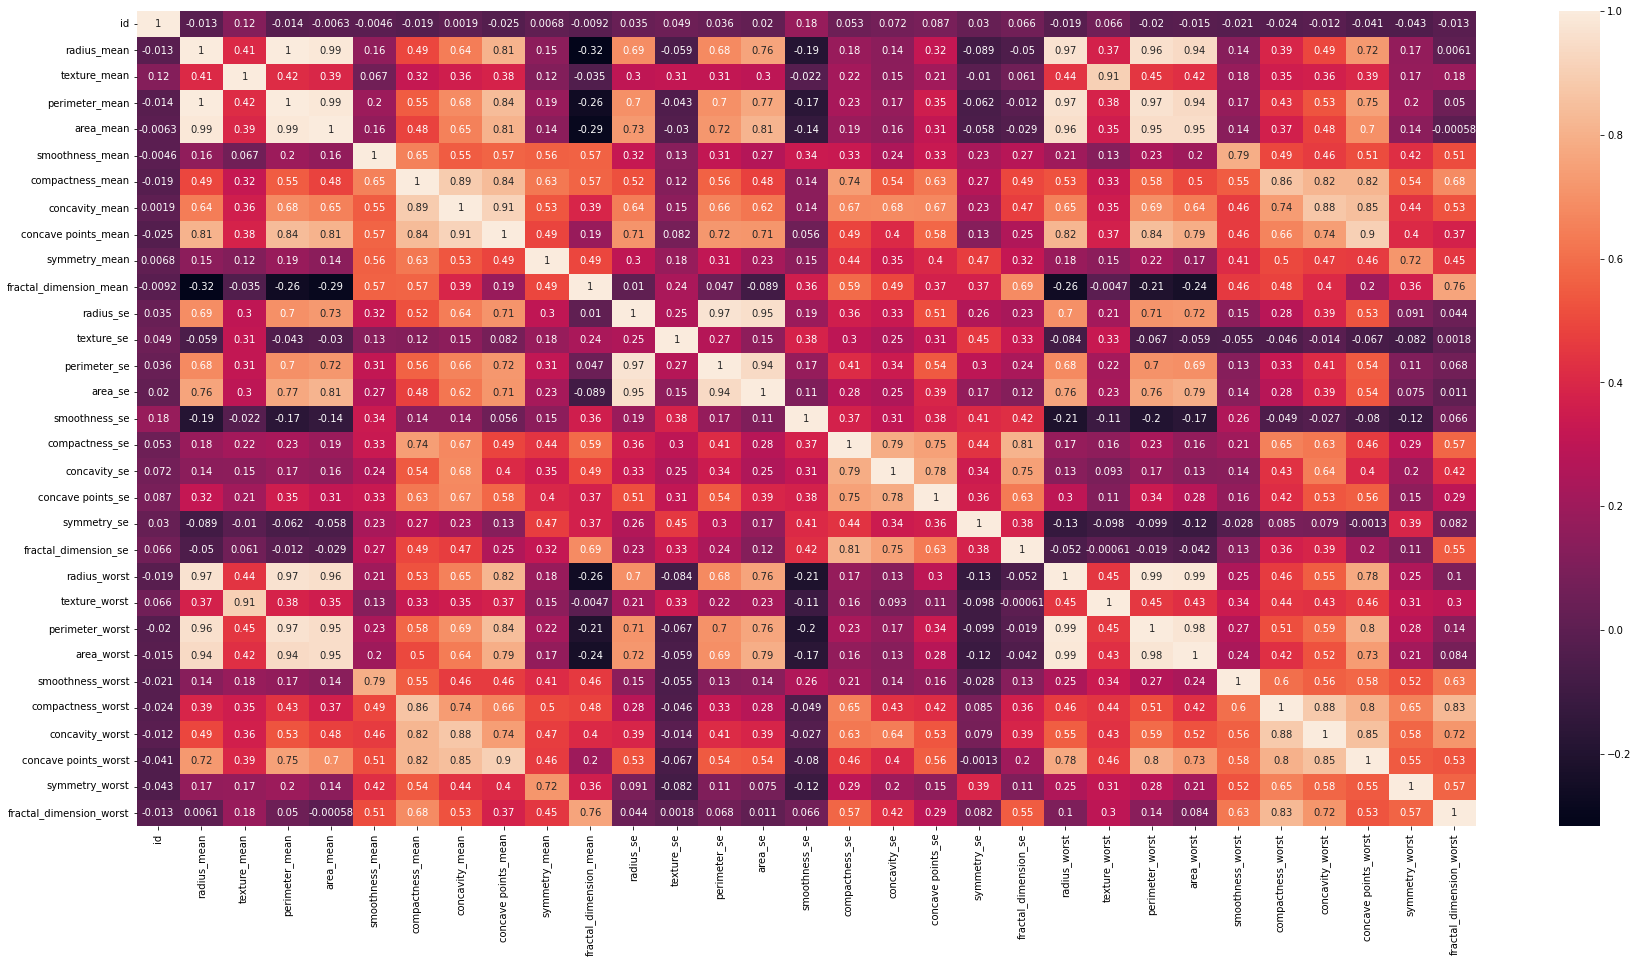

In [8]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True)

In [9]:
df = df.drop(['id'],axis=1)

In [10]:
labelencoder = LabelEncoder()

In [11]:
df["diagnosis"] = labelencoder.fit_transform(df["diagnosis"])

In [12]:
df["diagnosis"].value_counts()

0    219
1    170
Name: diagnosis, dtype: int64

In [13]:
y = df.iloc[:,0]
x = df.iloc[:,1:]

In [14]:
cols = x.columns

In [15]:
ss = StandardScaler()
x = ss.fit_transform(x)

In [16]:
model = xgb.XGBClassifier()

In [17]:
feat_selec = BorutaPy(model , n_estimators='auto')

In [18]:
feat_selec.fit(x,y)

BorutaPy(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                 callbacks=None, colsample_bylevel=1,
                                 colsample_bynode=1, colsample_bytree=1,
                                 early_stopping_rounds=None,
                                 enable_categorical=False, eval_metric=None,
                                 gamma=0, gpu_id=-1, grow_policy='depthwise',
                                 importance_type=None,
                                 interaction_constraints='',
                                 learning_rate=0.300000012, max_bin=256,
                                 max_cat_to_onehot=4, max_delta_step=0,
                                 max_depth=6, max_leaves=0, min_child_weight=1,
                                 missing=nan, monotone_constraints='()',
                                 n_estimators=81, n_jobs=0, num_parallel_tree=1,
                                 predictor='auto', random_state=12887904,
     

In [19]:
feat_selec.support_

array([ True,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True, False, False])

In [20]:
filtered_cols = []
for i in range(len(feat_selec.support_)):
    if(feat_selec.support_[i]==True):
        filtered_cols.append(cols[i])

In [21]:
filtered_cols

['radius_mean',
 'texture_mean',
 'smoothness_mean',
 'concave points_mean',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'concavity_worst',
 'concave points_worst']

In [22]:
feat_selec.ranking_

array([ 1,  1, 19,  4,  1, 16, 12,  1, 15, 18,  2, 13,  5,  6, 10,  8, 20,
       14, 10, 16,  1,  1,  1,  1,  1,  9,  1,  1,  3,  7])

In [23]:
x_filtered = feat_selec.transform(x)

In [24]:
x_filtered.shape

(389, 11)

In [25]:
y.shape

(389,)

In [26]:
ann = Sequential()
ann.add(Dense(9 , input_shape=(len(filtered_cols),), activation="relu"))
ann.add(Dense(400 , activation="relu"))
ann.add(Dense(100 , activation="relu"))
ann.add(Dense(2 , activation="softmax"))

In [27]:
ann.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [28]:
history = ann.fit(x_filtered,y,batch_size=64,epochs=500)

Epoch 1/500
7/7 [==============================] - 1s 3ms/step - loss: 0.6141 - accuracy: 0.7866
Epoch 2/500
7/7 [==============================] - 0s 1ms/step - loss: 0.3865 - accuracy: 0.9254
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2559 - accuracy: 0.9280
Epoch 4/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1982 - accuracy: 0.9332
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 0.1748 - accuracy: 0.9357
Epoch 6/500
7/7 [==============================] - 0s 5ms/step - loss: 0.1584 - accuracy: 0.9383
Epoch 7/500
7/7 [==============================] - 0s 5ms/step - loss: 0.1418 - accuracy: 0.9434
Epoch 8/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1295 - accuracy: 0.9434
Epoch 9/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1203 - accuracy: 0.9512
Epoch 10/500
7/7 [==============================] - 0s 4ms/step - loss: 0.1077 - accuracy: 0.9563
Epoch 11/500
7/7 [===========

Text(0, 0.5, 'loss')

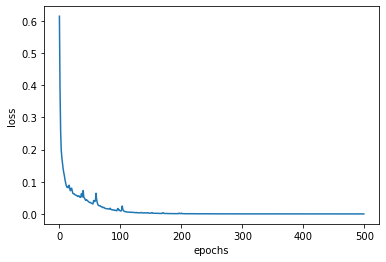

In [29]:
plt.plot(history.history["loss"])
plt.xlabel("epochs")
plt.ylabel("loss")

Text(0, 0.5, 'accuracy')

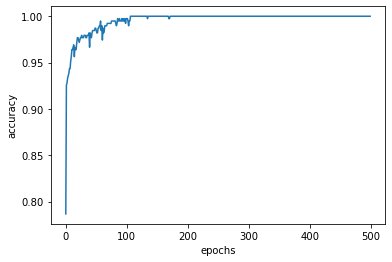

In [30]:
plt.plot(history.history["accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")